In [13]:
import sys
import random

from utilities.transitionDatasetGeneration import *

In [65]:
# Define a simple neural network model
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, dropout_prob=0.05):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.dropout3 = nn.Dropout(dropout_prob)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.dropout4 = nn.Dropout(dropout_prob)
        self.fc5 = nn.Linear(hidden_size4, 2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

#Clase para simplificar la creación de los modelos a partir de las sublistas de transiciones
class ModelTrainer33:
    def __init__(self, T, n_epochs, hidden_size1, hidden_size2, hidden_size3, hidden_size4, rand_seed = False, dropout = False):
        if rand_seed:
            self.seed = random.randint(1, 10000)
            torch.manual_seed(self.seed)

        self.T = T
        
        self.dropout = dropout

        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.hidden_size3 = hidden_size3
        self.hidden_size4 = hidden_size4

        self.sy_values = np.array([], dtype = np.float32)
        self.sx_values = np.array([], dtype = np.float32)
        self.a_values = np.array([], dtype = np.float32)
        self.sy1_values = np.array([], dtype = np.float32)
        self.sx1_values = np.array([], dtype = np.float32)

        self.X = None
        self.y = None
        self.X_tensor = None
        self.y_tensor = None
        
        self.n_epochs = n_epochs
        self.losses = []
    
    def train(self):
        for t in self.T:
            self.sy_values = np.append(self.sy_values, t[0])
            self.sx_values = np.append(self.sx_values, t[1])
            self.a_values = np.append(self.a_values, t[2])
            self.sy1_values = np.append(self.sy1_values, t[3])
            self.sx1_values = np.append(self.sx1_values, t[4])

        self.X = np.column_stack((self.sy_values, self.sx_values, self.a_values))
        self.y = np.column_stack((self.sy1_values, self.sx1_values))

        self.X_tensor = torch.FloatTensor(self.X)
        self.y_tensor = torch.FloatTensor(self.y)

        # Instantiate the model
        self.model = FeedForwardNN(input_size=3, hidden_size1=self.hidden_size1, hidden_size2=self.hidden_size2, hidden_size3=self.hidden_size3, hidden_size4=self.hidden_size4)

        # Define loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=0.001)

        for epoch in range(self.n_epochs):
            # Forward pass
            outputs = self.model(self.X_tensor)
            loss = criterion(outputs, self.y_tensor)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            self.losses.append(loss.item())
        
        print("Trained successfully!")
        print(f'Final loss: {self.losses[-1]}\n')
        
    def show_loss(self):
        plt.xlabel("# Epoch")
        plt.ylabel("Loss Magnitude")
        plt.plot(self.losses)
        plt.show()



In [66]:
maze1 = {"name":"maze1",
        "layout":[
        ['x', '#', 'x', 'x', '.', '.', '.', '.', '#', '#', '#', '#', '.', 'G'],#0
        ['x', '#', 'x', '#', '#', '#', '.', '.', '.', '.', '.', '.', '.', '.'],#1
        ['x', 'x', 'x', 'x', '.', '#', '.', '.', '#', '.', '.', '#', '.', '.'],#2
        ['x', '#', '#', '#', '.', '#', '.', '.', '.', '.', '.', '#', '.', '.'],#3
        ['x', 'x', '#', 'x', '.', '#', '#', '#', '#', '#', '.', '#', '#', '.'],#4
        ['x', 'x', 'x', 'x', '.', '.', '.', 'x', 'x', 'x', '.', '.', '#', '.'],#5
        ['#', '#', '#', '#', '#', '.', '#', '#', 'x', 'x', '.', '.', '#', '.'],#6
        ['.', 'x', 'x', 'x', '#', '.', '.', '#', 'x', 'x', '.', '.', '.', '.'],#7
        ['.', 'x', 'x', 'x', '#', '.', '.', '#', '.', '#', '.', '#', '#', '#'],#8
        ['#', 'x', '#', '.', '#', '.', '#', '#', '.', '#', '.', '.', '.', '.'],#9
        ['.', '.', '#', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.'],#10
        ['.', '#', '#', '.', '#', '.', '.', '.', '.', '#', '.', '#', '#', '.'],#11
        ['.', '.', '.', '.', '#', '#', '.', '#', '.', '#', '.', '.', '#', '.'],#12
        ['S', '.', '.', '.', '#', '.', '.', '#', '.', '#', '.', '.', '#', '.'],#13
        # 0    1    2    3    4    5    6    7    8    9   10   11   12   13
        ]}

maze2 = {"name":"maze2",
        "layout":[
        ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],#0
        ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.'],#1
        ['#', '#', '.', '#', '.', '.', '.', '.', '.', '#', '#', '#', '#', '.'],#2
        ['#', '.', '.', '#', '#', '#', '#', '#', '#', '#', '.', '.', '.', '.'],#3
        ['.', '.', '.', '#', 'x', 'x', 'x', 'x', 'x', '#', '.', '#', '.', '.'],#4
        ['.', '.', '.', '#', 'x', 'x', 'x', 'x', 'x', '#', '.', '.', '.', '.'],#5
        ['.', '#', '.', '.', 'x', 'x', 'x', 'x', 'x', '#', '.', '.', '.', '.'],#6
        ['.', '#', '.', '#', 'x', 'x', 'x', 'x', 'x', '#', '.', '.', '.', '.'],#7
        ['.', '.', '.', '#', 'x', 'x', 'x', 'x', 'x', '#', '.', '.', '.', '.'],#8
        ['.', '#', '.', '#', '#', '#', '.', '#', '#', '#', '.', '.', '.', '.'],#9
        ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '#', '.'],#10
        ['.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '#', '.'],#11
        ['.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '#', '.'],#12
        ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],#13
        # 0    1    2    3    4    5    6    7    8    9   10   11   12   13
        ]}

maze3 = {"name":"maze3",
        "layout":[
        ['.', '.', 'G'],#0
        ['.', '.', '.'],#1
        ['x', 'x', 'x'],#2
        # 0    1    2
        ]}

In [73]:
maze = maze2["layout"]
n_epochs = 1800
n_models = 9
hidden_size1 = 32
hidden_size2 = 64
hidden_size3 = 32
hidden_size4 = 16

In [74]:
all_transitions = transition_generator(maze)
new_transitions = transitions_families_generator_FULLY_REPRESENTED(all_transitions, n_models)

In [75]:
models_arr = []

for i in range(len(new_transitions)):
    print(f"Training model {i+1}...")

    model = ModelTrainer33(all_transitions, n_epochs, hidden_size1, hidden_size2, hidden_size3, hidden_size4, rand_seed=True)#, dropout=True)

    #model = ModelTrainer33(new_transitions[i], n_epochs, hidden_size1, hidden_size2, rand_seed=True, dropout = True)

    model.train()
    models_arr.append(model)

Training model 1...
Trained successfully!
Final loss: 1.0605993270874023

Training model 2...
Trained successfully!
Final loss: 0.9002242684364319

Training model 3...
Trained successfully!
Final loss: 0.860101044178009

Training model 4...
Trained successfully!
Final loss: 1.2891780138015747

Training model 5...
Trained successfully!
Final loss: 1.0668325424194336

Training model 6...
Trained successfully!
Final loss: 1.0057324171066284

Training model 7...
Trained successfully!
Final loss: 0.9156941175460815

Training model 8...
Trained successfully!
Final loss: 0.9171017408370972

Training model 9...
Trained successfully!
Final loss: 0.9041483402252197



In [76]:
"""print('\nEVALUATION:\n')

arr1 = []
arr2 = []

for model in models_arr:
    # Single predictions
    with torch.no_grad():
        inp = torch.FloatTensor([[1, 1, 3]])
        resultado = model.model(inp)
        resultado = resultado.detach().numpy()
        arr1.append(np.int32(np.round(resultado[0])))


        
        inp = torch.FloatTensor([[6, 6, 1]])
        resultado = model.model(inp)
        resultado = resultado.detach().numpy()
        #print(resultado[0])
        arr2.append(np.int32(np.round(resultado[0])))

#print('\n') 
for elem, elem2 in zip(arr1, arr2):
    print(elem, '         ', elem2)"""

"print('\nEVALUATION:\n')\n\narr1 = []\narr2 = []\n\nfor model in models_arr:\n    # Single predictions\n    with torch.no_grad():\n        inp = torch.FloatTensor([[1, 1, 3]])\n        resultado = model.model(inp)\n        resultado = resultado.detach().numpy()\n        arr1.append(np.int32(np.round(resultado[0])))\n\n\n        \n        inp = torch.FloatTensor([[6, 6, 1]])\n        resultado = model.model(inp)\n        resultado = resultado.detach().numpy()\n        #print(resultado[0])\n        arr2.append(np.int32(np.round(resultado[0])))\n\n#print('\n') \nfor elem, elem2 in zip(arr1, arr2):\n    print(elem, '         ', elem2)"

In [77]:
#FUNCION PARA MOSTRAR UNA GRÁFICA CON LAS PROBABILIDADES DE CADA ACCIÓN PARA CADA CASILLA DEL GRID
def probMapper(grid, models, threshold = 50.0):

    if len(grid) < 8:
        shape = "5x5"
    else:
        shape = "14x14"

    #print("Models loaded")

    empty_grid = [['' for i in range(len(grid[0]))] for j in range(len(grid))]

    n_rows, n_cols = len(grid), len(grid[0])

    with torch.no_grad():

        for y in range(n_rows):
            for x in range(n_cols):
                if grid[y][x] == "#":
                    empty_grid[y][x] = "#" 
                else:
                    for i in range(4):
                        posibilidades = []

                        test_input = torch.tensor([[float(y), float(x), float(i)]], dtype=torch.float32)
                        
                        for i in range(len(models)):
                            resultado = models[i].model(test_input)
                            resultado = resultado.detach().numpy()
                            posibilidades.append([round(resultado[0][0]), round(resultado[0][1])])
                        
                        #Calculo el porcentaje de veces que aparece cada posibilidad
                        probability_dict = {str(posibilidades.count(p)/len(posibilidades)*100) + "%": p for p in posibilidades}

                        probability_dict = {}
                        for p in posibilidades:
                            if not str(p) in probability_dict:
                                probability_dict[str(p)] = str(posibilidades.count(p)/len(posibilidades))

                        #Ordeno el diccionario por las probabilidades de mayor a menor
                        probability_dict = {k: v for k, v in sorted(probability_dict.items(), key=lambda item: item[1], reverse=True)}
                        
                        highest_probability = list(probability_dict.keys())[0]

                        #convertirla de nuevo a lista
                        highest_probability = highest_probability.replace("[", "").replace("]", "").split(", ")

                        highest_probability = [highest_probability[0], highest_probability[1]]


                        for p in probability_dict:
                            empty_grid[y][x] = empty_grid[y][x] + str(p) + ": "+ str(round(float(probability_dict[p])*100, 2))+"% "
                            break
                        #print("Probabilidad " + str(p) + ": " + str(posibilidades.count(p)/len(posibilidades)*100) + "%")

    binary_grid = np.where(np.array(empty_grid) == '#', 0, 1)

    if shape == "5x5":
        plt.figure(figsize=(8, 8))
        fontsize1 = 8
        fontsize2 = 10
    elif shape == "14x14":
        plt.figure(figsize=(16, 16))
        fontsize1 = 6
        fontsize2 = 8
    # Create a plot
    plt.imshow(binary_grid, cmap='gray', interpolation='nearest')
    # Set the locations of gridlines explicitly to have them at non
    # -even indices
    plt.xticks(np.arange(-0.5, len(binary_grid[0]), 1), [])
    plt.yticks(np.arange(-0.5, len(binary_grid), 1), [])

    plt.grid(True, color='black', linewidth=2, which='both', linestyle='-', alpha=0.5)

    # Draw diagonal lines in each cell to divide it into sectors
    for i in range(len(binary_grid)):
        for j in range(len(binary_grid[0])):

            if binary_grid[i, j] == 1:  # Check if the cell is white
                plt.plot([j - 0.5, j + 0.5], [i - 0.5, i + 0.5], color='black', linewidth=1)
                plt.plot([j + 0.5, j - 0.5], [i - 0.5, i + 0.5], color='black', linewidth=1)

                text = empty_grid[i][j].split("%")
                text1state = text[0].split(":")[0].replace(" ", "")
                text1prob = text[0].split(":")[1] + "%"
                text2state = text[1].split(":")[0].replace(" ", "")
                text2prob = text[1].split(":")[1] + "%"
                text3state = text[2].split(":")[0].replace(" ", "")
                text3prob = text[2].split(":")[1] + "%"
                text4state = text[3].split(":")[0].replace(" ", "")
                text4prob = text[3].split(":")[1] + "%"

                WrongTransitionsCount = 0
                
                for a in range(4):

                    if a == 0:  # Mover hacia el norte
                        if binary_grid[max(0, i - 1), j] == 0:
                            y1, x1 = i, j
                        else:
                            y1, x1 = max(0, i - 1), j

                        if y1 != int(text1state.replace("[", "").replace("]", "").split(",")[0]) or x1 != int(text1state.replace("[", "").replace("]", "").split(",")[1]):
                            color1state = 'orange'
                            WrongTransitionsCount += 1
                        else:
                            color1state = 'green'
                    
                    elif a == 1:  # Mover hacia el sur
                        if binary_grid[min(n_rows - 1, i + 1), j] == 0:
                            y1, x1 = i, j
                        else:
                            y1, x1 = min(n_rows - 1, i + 1), j

                        if y1 != int(text2state.replace("[", "").replace("]", "").split(",")[0]) or x1 != int(text2state.replace("[", "").replace("]", "").split(",")[1]):
                            color2state = 'orange'
                            WrongTransitionsCount += 1
                        else:
                            color2state = 'green'
                    
                    elif a == 2:  # Mover hacia el oeste
                        if binary_grid[i, max(0, j - 1)] == 0:
                            y1, x1 = i, j
                        else:
                            y1, x1 = i, max(0, j - 1)
                        
                        if y1 != int(text3state.replace("[", "").replace("]", "").split(",")[0]) or x1 != int(text3state.replace("[", "").replace("]", "").split(",")[1]):
                            color3state = 'orange'
                            WrongTransitionsCount += 1
                        else:
                            color3state = 'green'
                    
                    elif a == 3:  # Mover hacia el este
                        if binary_grid[i, min(n_cols - 1, j + 1)] == 0:
                            y1, x1 = i, j
                        else:
                            y1, x1 = i, min(n_cols - 1, j + 1)
                        
                        if y1 != int(text4state.replace("[", "").replace("]", "").split(",")[0]) or x1 != int(text4state.replace("[", "").replace("]", "").split(",")[1]):
                            color4state = 'orange'
                            WrongTransitionsCount += 1
                        else:
                            color4state = 'green'

                LowPercentageCount = 0
                # Add text based on the sector
                if float(text[0].split(":")[1]) >= threshold:
                    color1prob = 'green'
                else:
                    color1prob = 'red'
                    LowPercentageCount += 1
                if float(text[1].split(":")[1]) >= threshold:
                    color2prob = 'green'
                else:
                    color2prob = 'red'
                    LowPercentageCount += 1
                if float(text[2].split(":")[1]) >= threshold:
                    color3prob = 'green'
                else:
                    color3prob = 'red'
                    LowPercentageCount += 1
                if float(text[3].split(":")[1]) >= threshold:
                    color4prob = 'green'
                else:
                    color4prob = 'red'
                    LowPercentageCount += 1

                plt.text(j, i - .4, text1state, ha='center', va='center', fontsize=fontsize1, color=color1state)  # North
                plt.text(j, i - .25, text1prob, ha='center', va='center', fontsize=fontsize1, color=color1prob)  # North

                plt.text(j, i + .25, text2state, ha='center', va='center', fontsize=fontsize1, color=color2state)  # South
                plt.text(j, i + .4, text2prob, ha='center', va='center', fontsize=fontsize1, color=color2prob)  # South

                plt.text(j - .3, i - .1, text3state, ha='center', va='center', fontsize=fontsize1, color=color3state)  # West
                plt.text(j - .3, i + .05, text3prob, ha='center', va='center', fontsize=fontsize1, color=color3prob)  # West

                plt.text(j + .3, i - .1, text4state, ha='center', va='center', fontsize=fontsize1, color=color4state)  # East
                plt.text(j + .3, i + .05, text4prob, ha='center', va='center', fontsize=fontsize1, color=color4prob)  # East
            
            else:
                plt.text(j, i, '[' + str(i) + ',' + str(j) + ']', ha='center', va='center', fontsize=fontsize2, color='white')

    #  Add row numbering on the left from top to bottom
    for i, label in enumerate(range(len(binary_grid))):
        plt.text(-0.8, i, str(label), ha='right', va='center', fontsize=12, color='black')

    # Add column numbering at the bottom
    for j, label in enumerate(range(len(binary_grid[0]))):
        plt.text(j, len(binary_grid) - 0.3, str(label), ha='center', va='top', fontsize=12, color='black')

    plt.show()

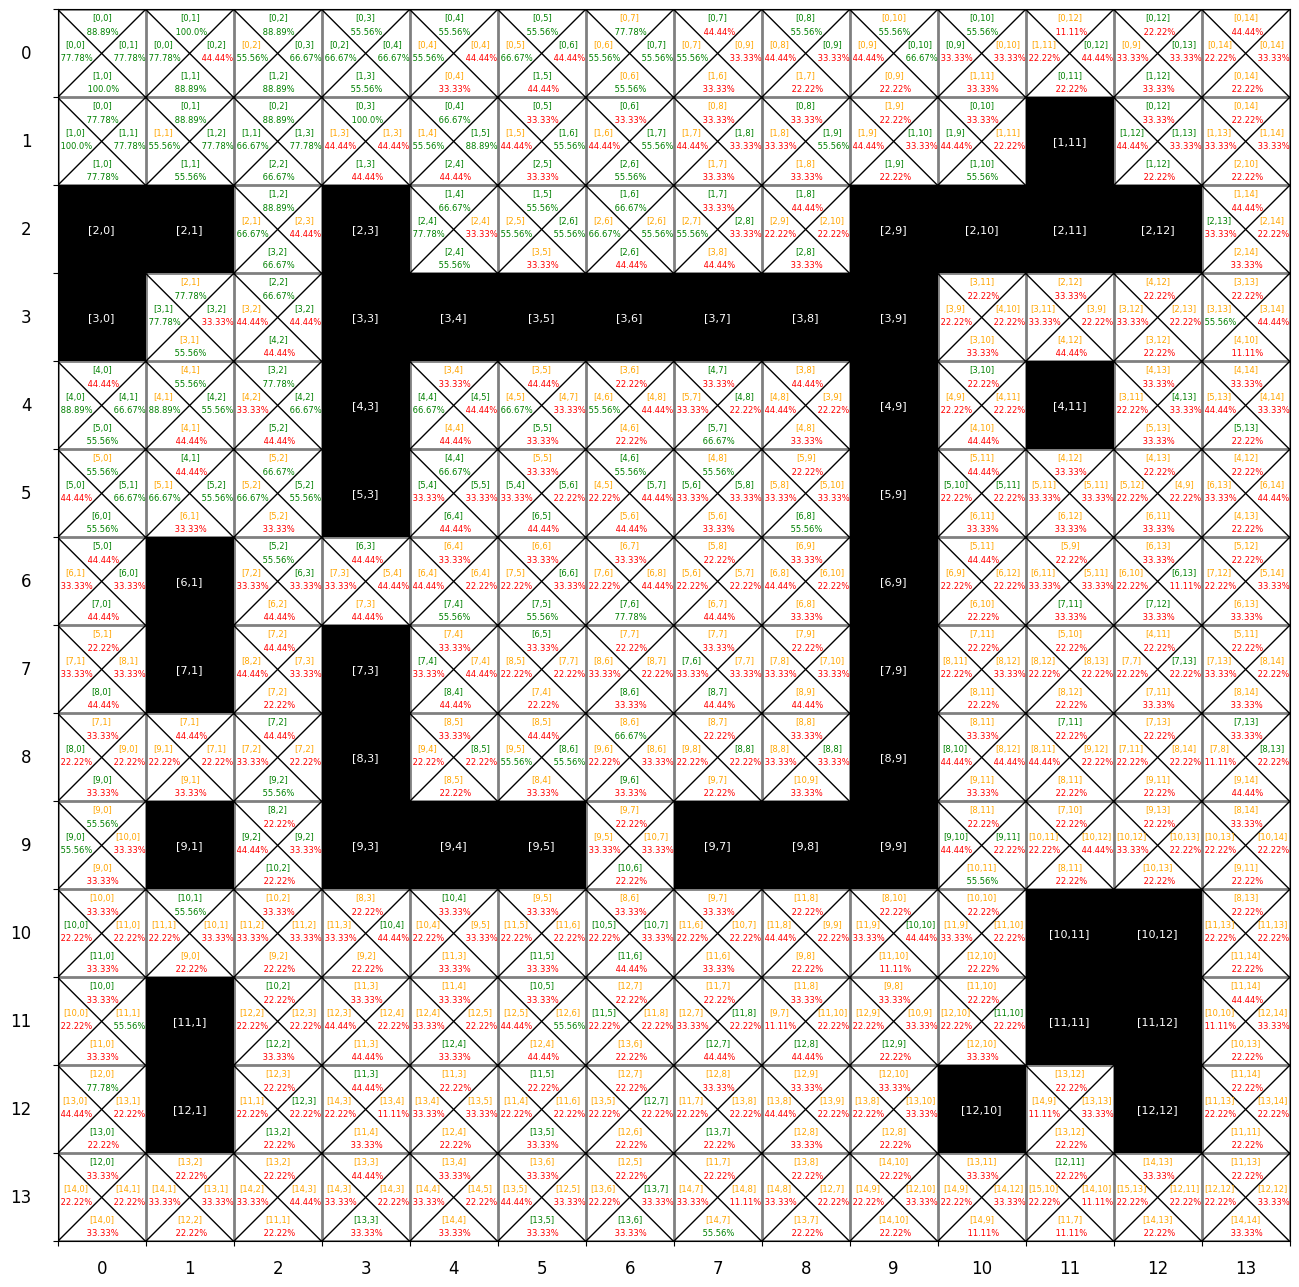

In [78]:
probMapper(maze, models_arr, threshold=50.0)